In [7]:
# This reads in FITS-format files of the GPI1 filter transmission curves, then fits them
# to spectra of corresponding bands in IFS images to determine approximate spectral resolution.

# The IFS illuminations are simply a broadband source as seen through a particular filter. They
# are not of calibration lamps, which are not available to us---so this procedure finds resolution
# only in this makeshift, approximate way.

# Created 2021 June 29 by E.S.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import glob
from scipy.interpolate import UnivariateSpline

%matplotlib inline

In [2]:
stem = "/Users/bandari/Documents/git.repos/gpi2_misc/data/"

In [3]:
def plot_transmission(file_name_leaf, cen, no_sky_subt=False):
    '''
    Reads in FITS file of an extracted spectral cube and plots the transmission
    
    INPUTS:
    file_name_leaf: leaf of file name beyond the 'stem' set above
    cen: center of PSF in (y,x)
    no_sky_subt: should sky be subtracted?
    '''
    
    hdul = fits.open(stem + file_name_leaf)
    
    image = hdul[1].data
    
    flux_array = np.nan*np.ones(len(image[:,0,0]))
    wavel_array = np.nan*np.ones(len(image[:,0,0]))
    
    wavel_start = hdul[1].header["CRVAL3"]
    wavel_step = hdul[1].header["CD3_3"]
    
    # loop over wavelength slices
    for i in range(0,len(image[:,0,0])):
        
        this_slice = image[i,:,:]
    
        level_sky = np.median(this_slice[200:226,144:182])

        # extract summed flux with square aperture
        aperture_square = this_slice[cen[0]-25:cen[0]+25,cen[1]-25:cen[1]+25]
        flux_sum = np.sum(aperture_square)
        sky_sum = np.sum(level_sky*np.ones(aperture_square.shape))
        
        # now background-subtract and put into array
        if not no_sky_subt:
            flux_array[i] = flux_sum-sky_sum
        else:
            flux_array[i] = flux_sum
        wavel_array[i] = wavel_start+i*wavel_step

        #print((len(np.squeeze(evt_data["wavel"].data))))

        # plot
        #wavel = np.squeeze(evt_data["wavel"].data)
        #transm = np.squeeze(evt_data["transm"].data)
        '''
        plt.plot(wavel,transm)
        plt.show()
        '''

    return wavel_array, flux_array

In [26]:
test_H = plot_transmission("S20210427E0008_spdc.fits", cen=[150,145])
test_J = plot_transmission("S20210427E0020_spdc.fits", cen=[150,145])
test_Y = plot_transmission("S20210427E0035_spdc.fits", cen=[150,145])
test_K1 = plot_transmission("S20210427E0050_spdc.fits", cen=[150,145])
test_K2 = plot_transmission("S20210427E0070_spdc.fits", cen=[150,145],no_sky_subt=True)

In [12]:
test_H_2013 = plot_transmission("S20140317S0082_spdc.fits", cen=[150,145],no_sky_subt=True)
test_H_2020 = plot_transmission("S20200118S0355_spdc.fits", cen=[150,145],no_sky_subt=True)
test_J_2014 = plot_transmission("S20140318S0366_spdc.fits", cen=[150,145],no_sky_subt=True)
test_J_2020 = plot_transmission("S20200118S0444_spdc.fits", cen=[150,145],no_sky_subt=True)
test_K1_2020 = plot_transmission("S20200118S0466_spdc.fits", cen=[150,145],no_sky_subt=True)

Text(0, 0.5, 'Normalized transmission')

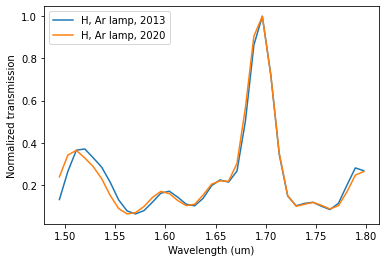

In [11]:
# H-band
plt.plot(test_H_2013[0],np.divide(test_H_2013[1],np.max(test_H_2013[1])), label="H, Ar lamp, 2013")
plt.plot(test_H_2020[0],np.divide(test_H_2020[1],np.max(test_H_2020[1])), label="H, Ar lamp, 2020")
plt.legend()
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
#plt.savefig("junk_H_band.png")

Text(0, 0.5, 'Normalized transmission')

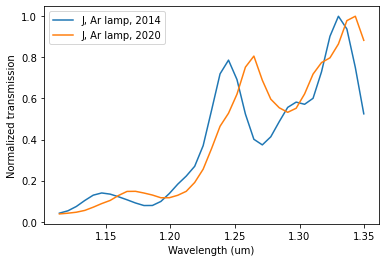

In [13]:
# J-band
plt.plot(test_J_2014[0],np.divide(test_J_2014[1],np.max(test_J_2014[1])), label="J, Ar lamp, 2014")
plt.plot(test_J_2020[0],np.divide(test_J_2020[1],np.max(test_J_2020[1])), label="J, Ar lamp, 2020")
plt.legend()
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
#plt.savefig("junk_H_band.png")

Text(0, 0.5, 'Normalized transmission')

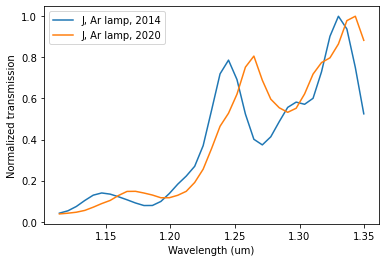

In [13]:
# J-band
plt.plot(test_J_2014[0],np.divide(test_J_2014[1],np.max(test_J_2014[1])), label="J, Ar lamp, 2014")
plt.plot(test_J_2020[0],np.divide(test_J_2020[1],np.max(test_J_2020[1])), label="J, Ar lamp, 2020")
plt.legend()
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
#plt.savefig("junk_H_band.png")

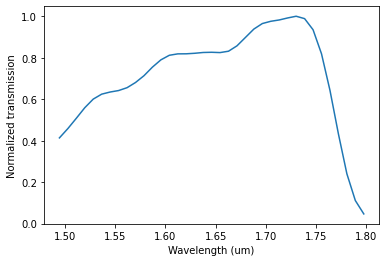

In [21]:
# H-band
plt.plot(test_H[0],np.divide(test_H[1],np.max(test_H[1])))
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
plt.savefig("junk_H_band.png")

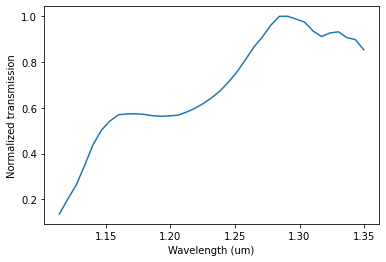

In [22]:
# J-band
plt.plot(test_J[0],np.divide(test_J[1],np.max(test_J[1])))
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
plt.savefig("junk_J_band.png")

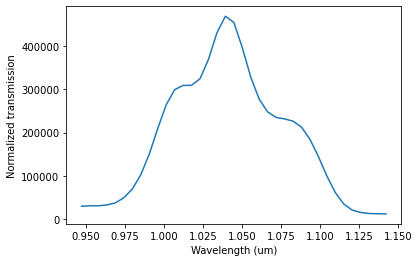

In [27]:
# Y-band
plt.plot(test_Y[0],np.divide(test_Y[1],np.max(test_Y[1])))
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
plt.savefig("junk_J_band.png")

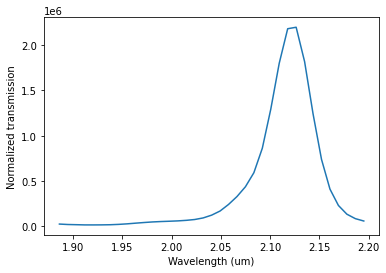

In [24]:
# K1-band
plt.plot(test_K1[0],np.divide(test_K1[1],np.max(test_K1[1])))
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
plt.savefig("junk_K1_band.png")

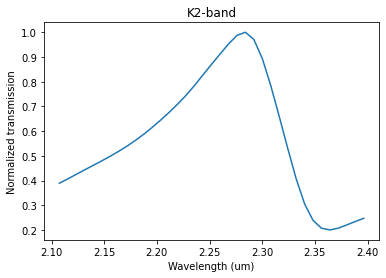

In [28]:
# K2-band
plt.plot(test_K2[0],np.divide(test_K2[1],np.max(test_K2[1])))
plt.xlabel("Wavelength (um)")
plt.ylabel("Normalized transmission")
plt.title("K2-band")
plt.savefig("junk_K2_band.png")